<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_05_ABC_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [ ]:
# escalar las variables de cada eje y tomar la misma cantidad de cada componente de la estratificacion de los datos para que la muestra de training y test sea representativa

# la distribuciones pueden pasarse a un codigo de montecarlo para que este haga predicciones a partir de la distribucion

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


#1.0 Analisis del data frame

1. Leer el data framen housing csv https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv




2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```

3. Determinar las columnas únicas asociadas a columna ocean_proximity.



4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value","ocean_proximity"]
```

5. Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


6. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [ ]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7dd543a47970>,
 'caps': [<matplotlib.lines.Line2D at 0x7dd543a47eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dd543a476d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dd543a74430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dd543a746d0>],
 'means': []}

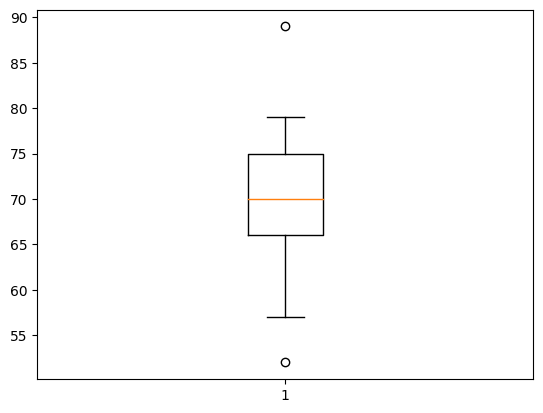

In [ ]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Emplando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for Camparing price per living space for each city')
plt.show()
```

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()
```

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

de latitud longitud y precio como color altura

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






In [142]:
import pandas as pd

url="https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df=pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [143]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [144]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [145]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [146]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [147]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#Add more meaningful features

In [148]:
df_train=df
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]

df.isnull().sum()


# df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
# df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()
#q=pd.DataFrame(q)
#q.isnull().sum()

dfc=df_train.fillna(median)
dfc=pd.DataFrame(dfc)
dfc.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'bedrooms_per_room'}>,
        <Axes: title={'center': 'population_per_household'}>]],
      dtype=object)

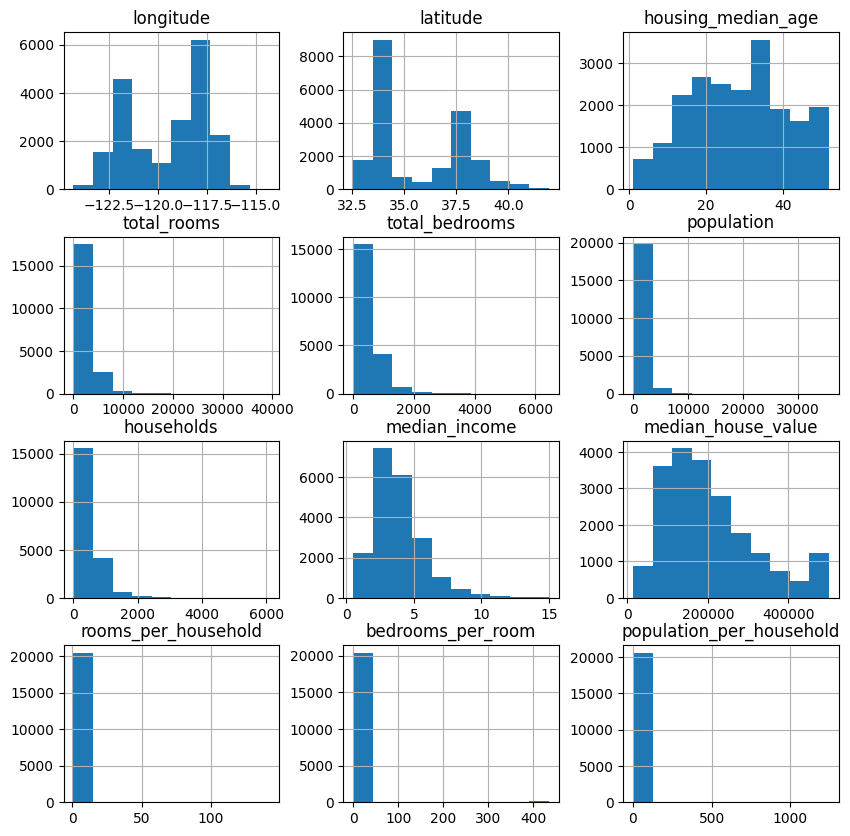

In [149]:
dfc.hist(figsize=(10,10))

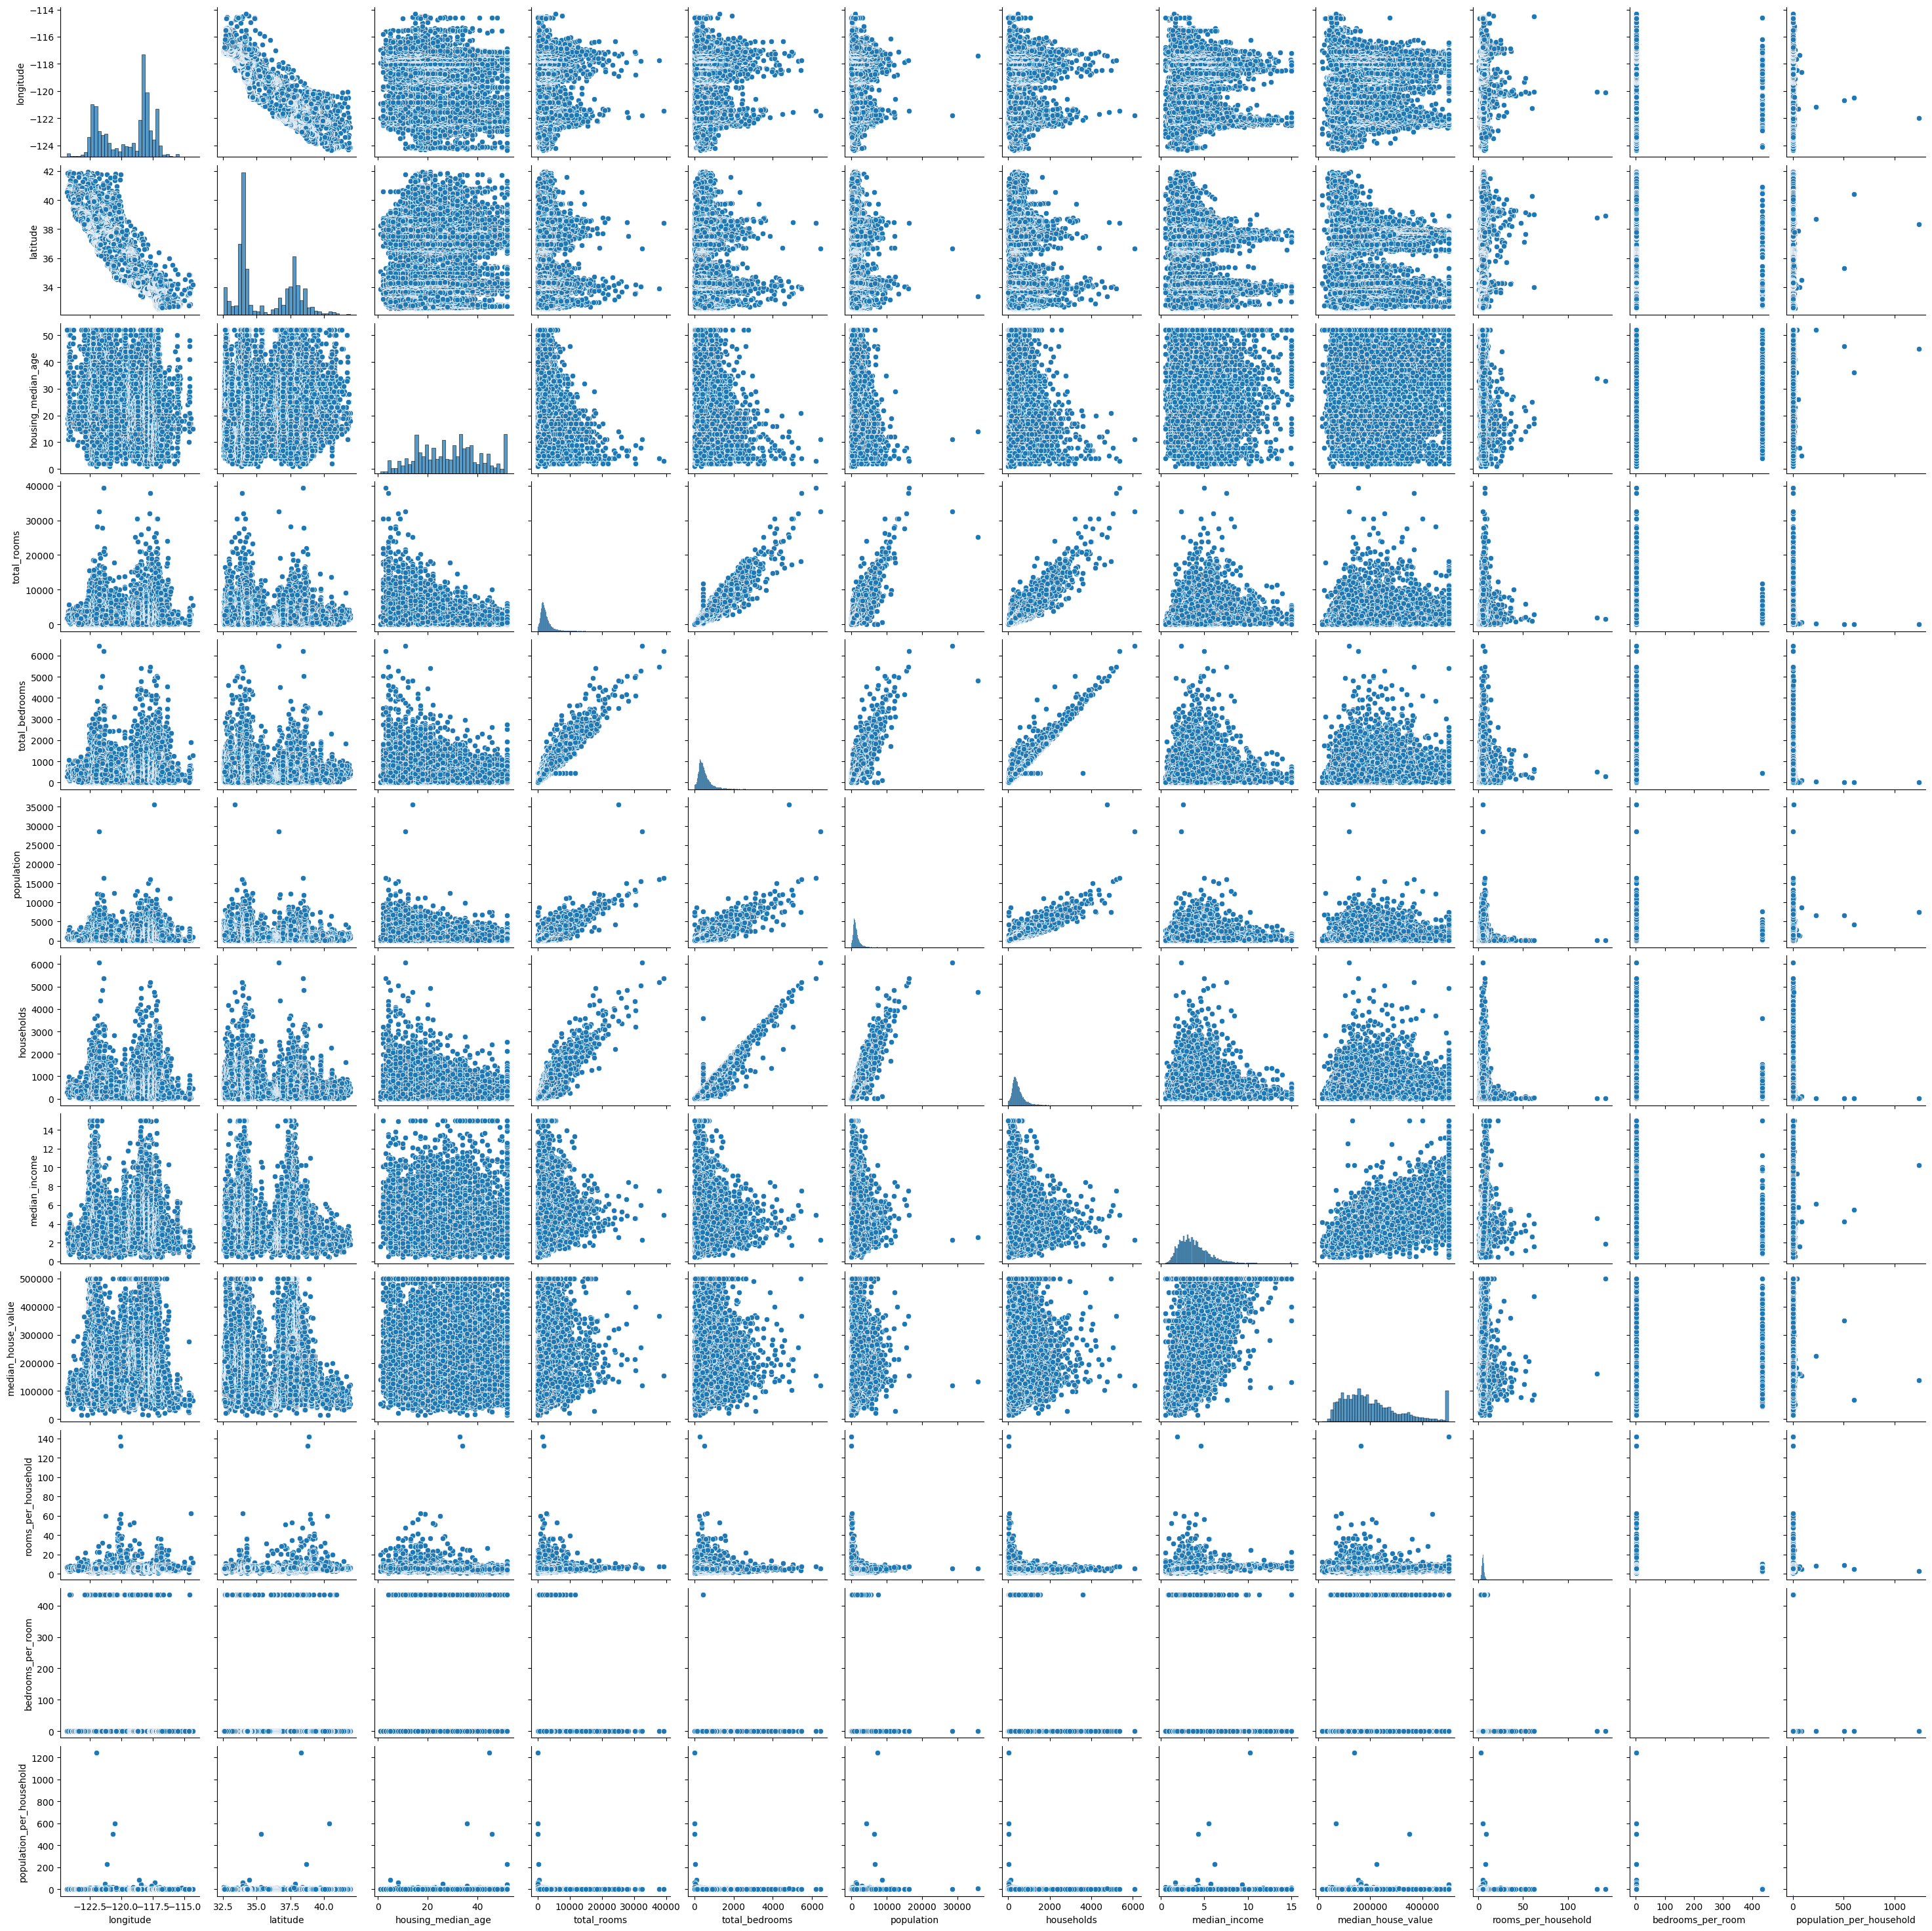

In [150]:
import seaborn as sns

#penguins = sns.load_dataset("")
sns.pairplot(dfc)
#vars=[col1,col2],hue=ocean_pacific,height
#sns.pairplot(dfc,kind="hist")

<Axes: xlabel='longitude', ylabel='latitude'>

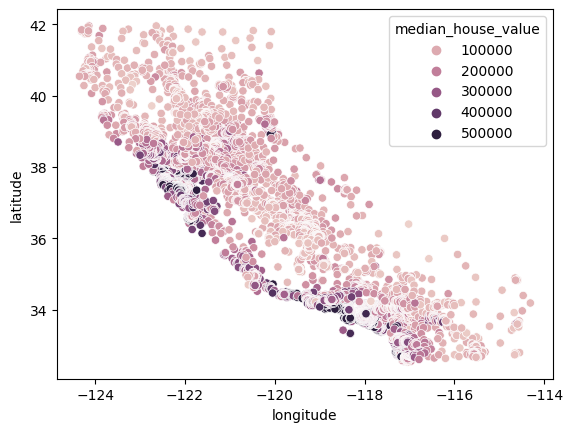

In [151]:
import seaborn as sns
#sns.scatterplot(data=dfc, x="longitude", y="latitude", hue="size", palette="deep", size="median_house_value")
sns.scatterplot(data=dfc, x="longitude", y="latitude", hue="median_house_value")
#numba@git

<Axes: xlabel='longitude', ylabel='latitude'>

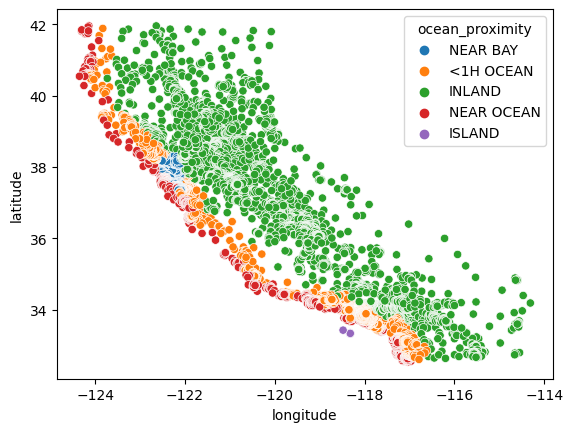

In [152]:
#median_house_value de latitud longitud y precio como color altura
sns.scatterplot(data=dfc, x="longitude", y="latitude", hue="ocean_proximity")

#from the two previous graphs it can be seen that the most expensive houses are the ones near the ocean, also the cheaper are the in-land houses

In [153]:
### to filter by columns and drop some of them
#cols = ["housing_median_age",    "total_rooms",    "total_bedrooms",    "population",    "households",    "median_income",    "median_house_value","ocean_proximity"]
#dfc=dfc[cols]

q=dfc.groupby(pd.Grouper("ocean_proximity")).mean()

"""
for name, group in q:
  print(name, group) #name is a label, group is a dataframe
  #print(type(group))
  plt.hist(group.Diff,label=name)
  plt.legend()
  plt.show()

  #overlapping densities (ridge plot) could be used to show all histogram
  #df.index.month
  """
q

longitude   latitude  housing_median_age  total_rooms  \
ocean_proximity                                                           
NEAR BAY        -122.260694  37.801057           37.730131  2493.589520   
<1H OCEAN       -118.847766  34.560577           29.279225  2628.343586   
INLAND          -119.732990  36.731829           24.271867  2717.742787   
NEAR OCEAN      -119.332555  34.738439           29.347254  2583.700903   
ISLAND          -118.354000  33.358000           42.400000  1574.600000   

                 total_bedrooms   population  households  median_income  \
ocean_proximity                                                           
NEAR BAY             513.491266  1230.317467  488.616157       4.172885   
<1H OCEAN            545.293892  1520.290499  517.744965       4.230682   
INLAND               533.051443  1391.046252  477.447565       3.208996   
NEAR OCEAN           537.446200  1354.008653  501.244545       4.005785   
ISLAND               420.400000   668.000000  276.600000       2.744420   

                 median_house_value  rooms_per_household  bedrooms_per_room  \
ocean_proximity                                                               
NEAR BAY              259212.311790             5.221705           4.010631   
<1H OCEAN             240084.285464             5.152576           5.072311   
INLAND                124805.392001             5.977265           3.853745   
NEAR OCEAN            249433.977427             5.206008           5.126334   
ISLAND                380440.000000             5.656577           0.273246   

                 population_per_household  
ocean_proximity                            
NEAR BAY                         2.620121  
<1H OCEAN                        3.051860  
INLAND                           3.302954  
NEAR OCEAN                       2.952176  
ISLAND                           2.383127

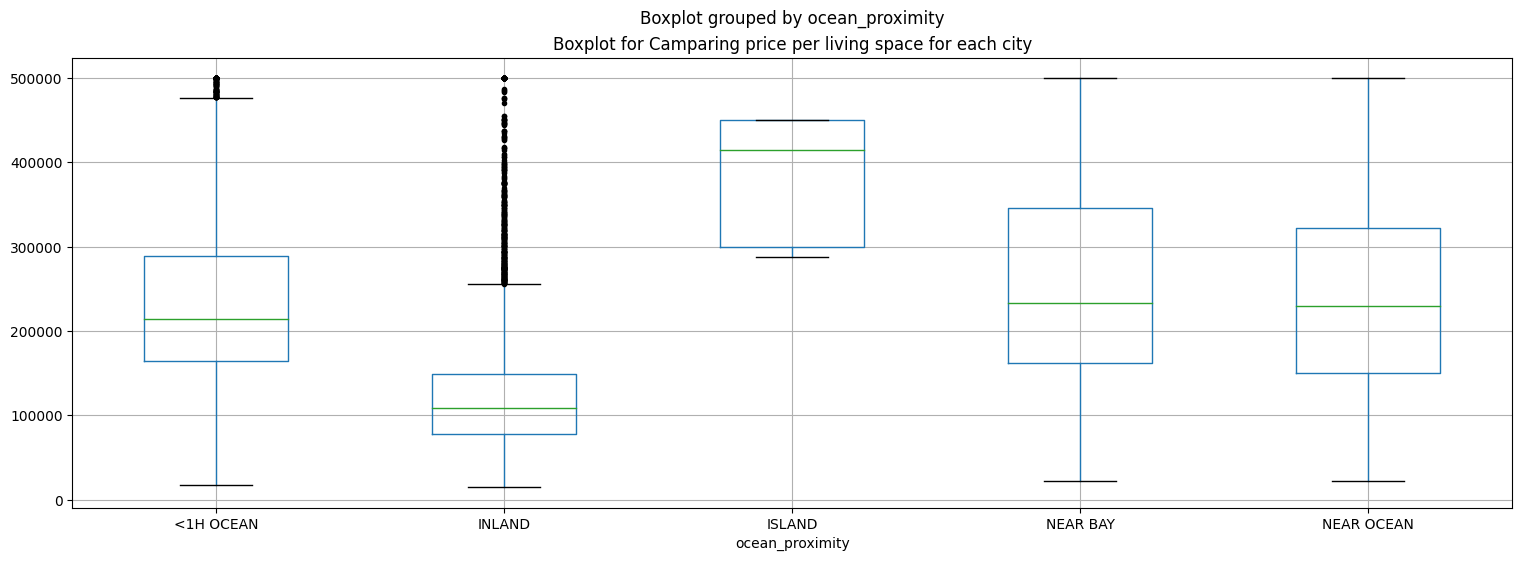

In [154]:
# draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for Camparing price per living space for each city')
plt.show()

In [155]:
"""
IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
"""

Q1 = dfc["median_house_value"].quantile(0.25)
Q3 = dfc["median_house_value"].quantile(0.75)
IQR = Q3 - Q1
dfc = dfc[~((dfc["median_house_value"]< (Q1 - 1.5 * IQR)) | (dfc["median_house_value"] > (Q3 + 1.5* IQR)))]
dfc

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
0            NEAR BAY             6.984127           0.146591   
1            NEAR BAY             6.238137           0.155797   
2            NEAR BAY             8.288136           0.129516   
3            NEAR BAY             5.817352           0.184458   
4            NEAR BAY             6.281853           0.172096   
...               ...                  ...                ...   
20635          INLAND             5.045455           0.224625   
20636          INLAND             6.114035           0.215208   
20637          INLAND             5.205543           0.215173   
20638          INLAND             5.329513           0.219892   
20639          INLAND             5.254717           0.221185   

       population_per_household  
0                      2.555556  
1                      2.109842  
2                      2.802260  
3                      2.547945  
4                      2.181467  
...                         ...  
20635                  2.560606  
20636                  3.122807  
20637                  2.325635  
20638                  2.123209  
20639                  2.616981  

[19569 rows x 13 columns]

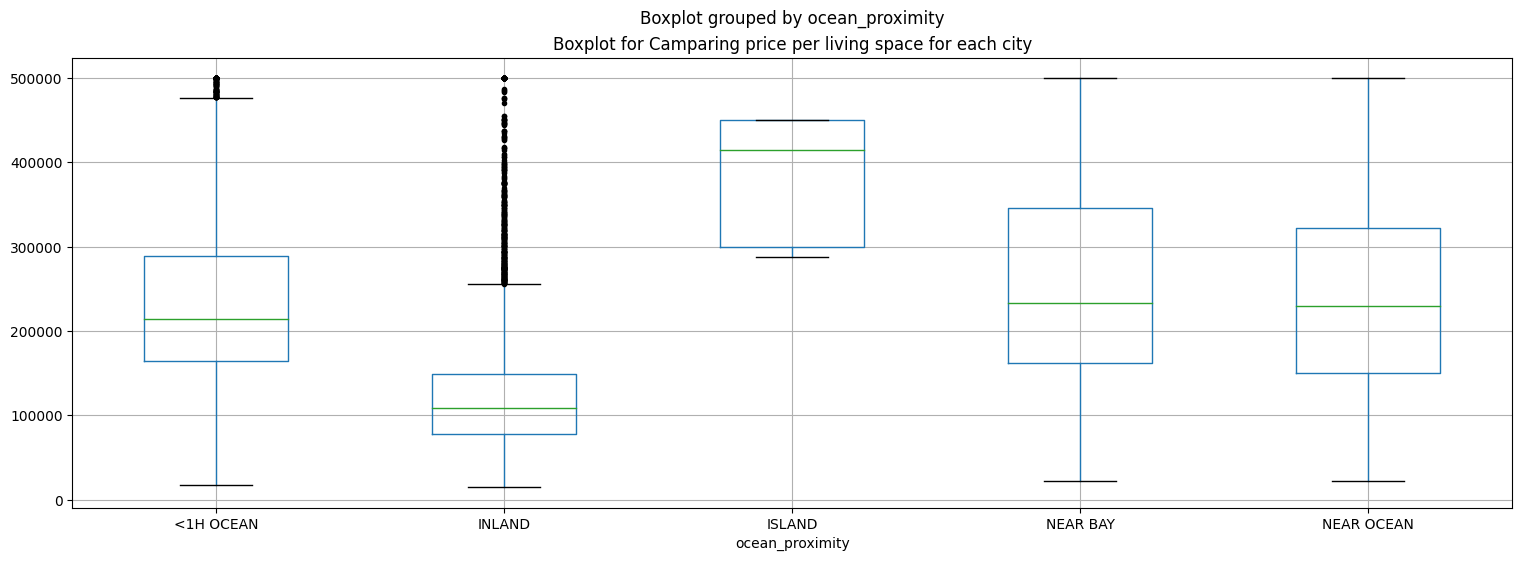

In [156]:
# draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for Camparing price per living space for each city')
plt.show()

<ipython-input-157-0d8489e825da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfc.corr()


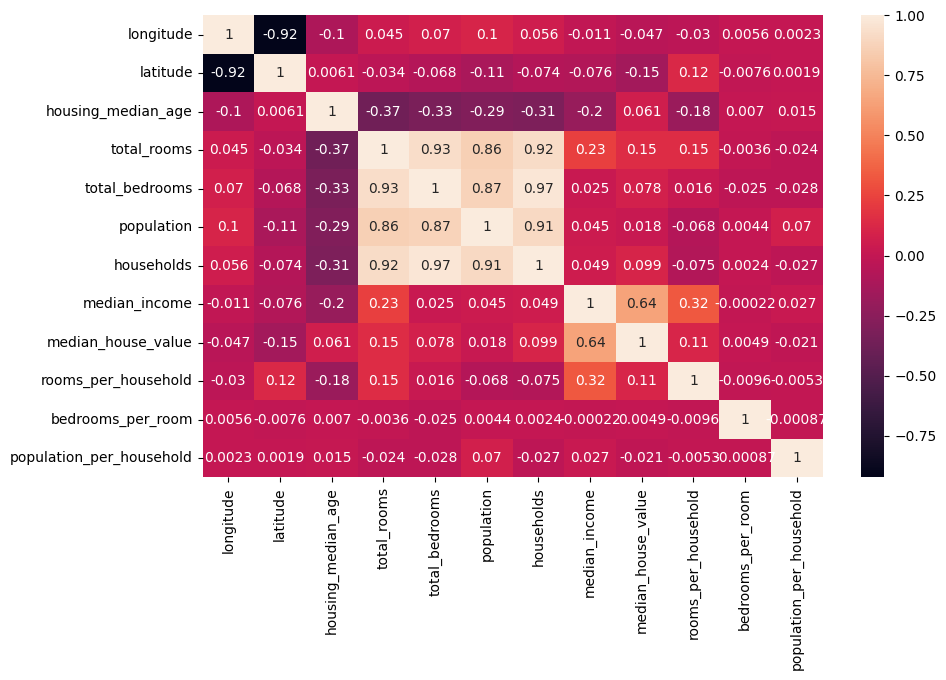

In [157]:
corr_matrix = dfc.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Correlations are observed for the household,population,total bedrooms and total rooms columns, indicating that the more people there are, the more rooms are.
#There are also correlations between median income, median house value and rooms per household, cause by the affordability of a house value based on the person incomes, but this correlations are smaller than the previous ones

#Clean Data

In [158]:
### Imputer ###

from sklearn.impute import SimpleImputer
# imputer = Imputer(strategy="median")

df_train_num = dfc.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19562786e+02,  3.56541591e+01,  2.83527518e+01,  2.61997726e+03,
        5.38821299e+02,  1.44278895e+03,  5.01394859e+02,  3.66556761e+00,
        1.90852302e+05,  5.35754772e+00,  4.65870158e+00,  3.09875961e+00])

In [159]:
df_train_num.median()


longitude                     -118.510000
latitude                        34.270000
housing_median_age              28.000000
total_rooms                   2110.000000
total_bedrooms                 435.000000
population                    1181.000000
households                     411.000000
median_income                    3.441200
median_house_value          173200.000000
rooms_per_household              5.181818
bedrooms_per_room                0.205349
population_per_household         2.839009
dtype: float64

#Las caracteristicas estadisticas cumplen con el mismo orden de magnitud entre si, aunque difieren un poco en valor, mostrando un tratamiento automatico de datos aceptable

In [160]:
##### Categoric features #####
from sklearn.preprocessing import OneHotEncoder
dfc["ocean_proximity"].unique()
housing_cat=dfc[["ocean_proximity"]]
housing_cat

ocean_proximity
0            NEAR BAY
1            NEAR BAY
2            NEAR BAY
3            NEAR BAY
4            NEAR BAY
...               ...
20635          INLAND
20636          INLAND
20637          INLAND
20638          INLAND
20639          INLAND

[19569 rows x 1 columns]

In [161]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr = dfc.join(df_cat_1hot)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


# in the first row, the 1 (one) in the fourth position indicates that it is near bay, and in the last row, it means inland

In [162]:

# Use the replace method to replace strings with numerical values
#df_cat_1hot['ocean_proximity'] = df_cat_1hot['ocean_proximity'].replace(mapping)
#df_cat_1hot

In [168]:
#Constuye la matriz de características:
dfc

X = imp_mean.transform(housing_tr)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
19564    -121.09     39.48                25.0       1665.0           374.0   
19565    -121.21     39.49                18.0        697.0           150.0   
19566    -121.22     39.43                17.0       2254.0           485.0   
19567    -121.32     39.43                18.0       1860.0           409.0   
19568    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
19564       845.0       330.0         1.5603             78100.0   
19565       356.0       114.0         2.5568             77100.0   
19566      1007.0       433.0         1.7000             92300.0   
19567       741.0       349.0         1.8672             84700.0   
19568      1387.0       530.0         2.3886             89400.0   

       rooms_per_household  bedrooms_per_room  population_per_household  
0                 6.984127           0.146591                  2.555556  
1                 6.238137           0.155797                  2.109842  
2                 8.288136           0.129516                  2.802260  
3                 5.817352           0.184458                  2.547945  
4                 6.281853           0.172096                  2.181467  
...                    ...                ...                       ...  
19564             5.045455           0.224625                  2.560606  
19565             6.114035           0.215208                  3.122807  
19566             5.205543           0.215173                  2.325635  
19567             5.329513           0.219892                  2.123209  
19568             5.254717           0.221185                  2.616981  

[19569 rows x 12 columns]

#this is the training set without categoric features

In [179]:
### Scaling #####
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms","total_bedrooms",    "population",    "households",    "median_income","<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr[cols]
housing_scale




KeyError: ignored

In [169]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)

housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

#2.0 Preparacion del data frame

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






In [ ]:
#stratifiedshufflesplit de sklearn.model_selection

#Preparacion del dataframe

In [173]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming 'df' is your DataFrame and 'target_column' is the column you want to stratify by
target_column = "ocean_proximity"
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Create indices for the train and test sets
for train_index, test_index in sss.split(dfc, dfc[target_column]):
    train_set = dfc.iloc[train_index]
    test_set = dfc.iloc[test_index]

In [174]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set = train_test_split(dfc, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

15655
3914


<ipython-input-175-5c255c3368d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["income_cat"] = pd.cut(dfc["median_income"],


<Axes: >

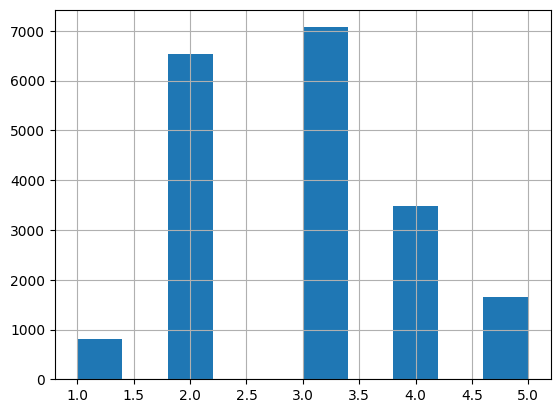

In [175]:
dfc["income_cat"] = pd.cut(dfc["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


dfc.income_cat.hist()

#distribucion que lleva en funcion de las categorias, dice la que mas tiene ingresos (2 y 3) y la que menos (1)

In [176]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dfc, dfc["income_cat"]):
  strat_train_set = dfc.iloc[train_index]
  strat_test_set = dfc.iloc[test_index]

In [177]:
dfc["income_cat"].value_counts() / len(dfc)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set = train_test_split(dfc, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

3    0.356883
2    0.336634
4    0.178026
5    0.086873
1    0.041584
Name: income_cat, dtype: float64

In [178]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(dfc, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(dfc),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
print(compare_props["Rand. %error"])
print(compare_props["Strat. %error"])

1    5.160678
2    0.987964
3    1.885404
4    2.535170
5    6.922247
Name: Rand. %error, dtype: float64
1    0.374095
2    0.005110
3    0.023165
4    0.052392
5    0.005110
Name: Strat. %error, dtype: float64


#estos resultados indican que la estratificacion representa una mejor distribucion de los datos

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```